In [14]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import random
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
#Read new csv and show
df = pd.read_csv('C:/Users/Elizabeth/Desktop/Gustavo Becerra/TDP/KD.csv')
df.drop('Unnamed: 0', axis= 1, inplace= True) #No needed it 
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,0
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38.0,6000.0,4.707435,no,no,no,good,no,no,0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.600000,no,no,no,good,no,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.000000,...,47.0,6700.0,4.900000,no,no,no,good,no,no,1
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.000000,...,54.0,7800.0,6.200000,no,no,no,good,no,no,1
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.000000,...,49.0,6600.0,5.400000,no,no,no,good,no,no,1
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.000000,...,51.0,7200.0,5.900000,no,no,no,good,no,no,1


In [3]:
#Input features with if-sentence
col_ot = 'pcv'
col_rc = 'rc'
col_wc = 'wc'
col_used = [col_ot, col_rc, col_wc]
col_dep = 'classification' #for predictions
all_cols= (df[col_ot]<= 45.0).all() and (df[col_rc] <= 5.20000).all() and (df[col_wc] <= 7300.0).all()

#n_pcv =(df[col_ot] >= 45.0).all()
if all_cols == True:
   col_dep == 0
else:
   col_dep == 1
#col_ot = n_pcv

   
col_ot1 = [col for col in col_used] #input features

df[col_dep].value_counts()

0    250
1    150
Name: classification, dtype: int64

In [42]:
#train_test_split and x, y declarations
x = df[col_ot1]
y = df[col_dep]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)
print(len(x_train) , len(y_train))

320 320


In [43]:
#Encoder
encoder = LabelEncoder()

for col in df.columns:
    df[col] = encoder.fit_transform(df[col])

df['classification'] = encoder.fit_transform(df['classification'])


In [44]:
#DTC and accuracy_score
acd = tree.DecisionTreeClassifier()

model = acd.fit(x_train, y_train)

y_pred = acd.predict(x_test)
acd_acc = accuracy_score(y_test, y_pred)

print (f"Accuracy_score is:" , acd_acc)

Accuracy_score is: 0.9375


In [46]:
# Just for examples
arr_pcv =[]
arr_rc = []
arr_wc = []
for i in range(80):
    arr_pcv.append(random.uniform(0.1,100.0))
    arr_rc.append(random.uniform(0.1,10.0))
    arr_wc.append(random.uniform(0.1,10000.0))
    #print(arr_pcv)
print(len(y_pred), len(arr_pcv), len(arr_wc))

80 80 80


In [47]:
pcv_pred = pd.DataFrame({'PCV generado': arr_pcv, 'RC generado': arr_rc, 'WC generado': arr_wc, 'KND?': y_pred})
pcv_pred

,PCV generado,RC generado,WC generado,KND?
0,59.729825,4.262436,8091.952491,0
1,70.367749,7.441571,2965.383935,1
2,1.882182,8.934645,5353.922025,0
3,57.484295,5.233185,7152.394070,0
4,48.793975,7.317829,1212.031005,0
...,...,...,...,...
75,18.830589,3.550003,4163.851239,0
76,56.535542,3.678216,5718.817801,0
77,98.652249,2.968045,4928.779394,1
78,92.182356,5.170846,2692.862445,1


[Text(0.395, 0.9642857142857143, 'X[0] <= 27.5\ngini = 0.472\nsamples = 320\nvalue = [198, 122]'),
 Text(0.16, 0.8928571428571429, 'X[1] <= 35.5\ngini = 0.044\nsamples = 178\nvalue = [174, 4]'),
 Text(0.08, 0.8214285714285714, 'X[0] <= 25.5\ngini = 0.034\nsamples = 176\nvalue = [173, 3]'),
 Text(0.04, 0.75, 'gini = 0.0\nsamples = 110\nvalue = [110, 0]'),
 Text(0.12, 0.75, 'X[2] <= 41.0\ngini = 0.087\nsamples = 66\nvalue = [63, 3]'),
 Text(0.08, 0.6785714285714286, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.16, 0.6785714285714286, 'X[2] <= 46.5\ngini = 0.094\nsamples = 61\nvalue = [58, 3]'),
 Text(0.12, 0.6071428571428571, 'X[0] <= 26.5\ngini = 0.098\nsamples = 58\nvalue = [55, 3]'),
 Text(0.08, 0.5357142857142857, 'gini = 0.101\nsamples = 56\nvalue = [53, 3]'),
 Text(0.16, 0.5357142857142857, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.2, 0.6071428571428571, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.24, 0.8214285714285714, 'X[0] <= 25.0\ngini = 0.5\nsamples =

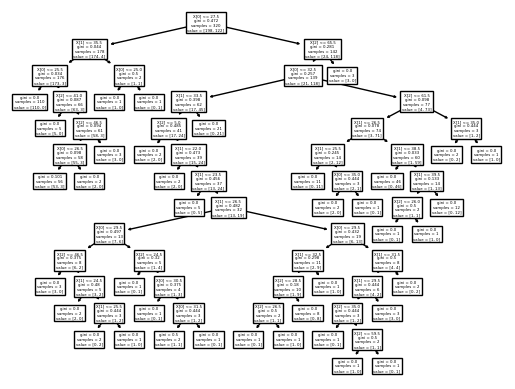

In [48]:
#Visualization of the tree
tree.plot_tree(acd)

Text(0.5, 25.722222222222214, 'Predicted')

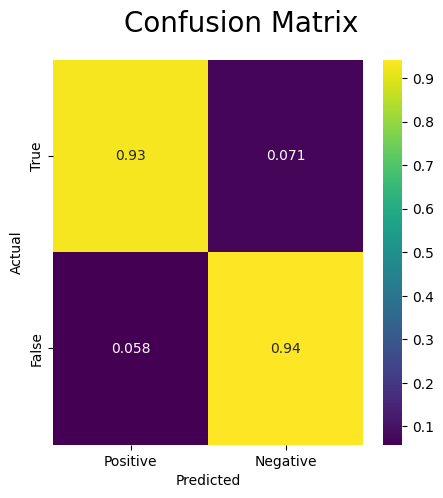

In [49]:
#Matrix Confusion
cm = confusion_matrix( y_test, y_pred, labels=[True, False])
cmn = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis])#*100
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cmn,annot=True, cmap='viridis', xticklabels=["Positive", "Negative"], yticklabels=[True, False])
plt.suptitle("Confusion Matrix", fontsize= 20)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [50]:
#classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        52
           1       0.90      0.93      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80



In [51]:
#MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f"The Mean Absolute Error is :", mae)
print(f"The Root Mean Squared Erros is:",rmse)

The Mean Absolute Error is : 0.0625
The Root Mean Squared Erros is: 0.25
